In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(550068, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
mean_pc2 = data["Product_Category_2"].mean()
data["Product_Category_2"] = data["Product_Category_2"].fillna(mean_pc2, inplace = True)

In [10]:
data["Product_Category_2"]

0         None
1         None
2         None
3         None
4         None
          ... 
550063    None
550064    None
550065    None
550066    None
550067    None
Name: Product_Category_2, Length: 550068, dtype: object

In [11]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(0)

In [12]:
data["Product_Category_3"] = data["Product_Category_3"].fillna(0)

In [13]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [15]:
data["Product_Category_3"] = data["Product_Category_3"].astype(int)

In [16]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int32
Purchase                       int64
dtype: object

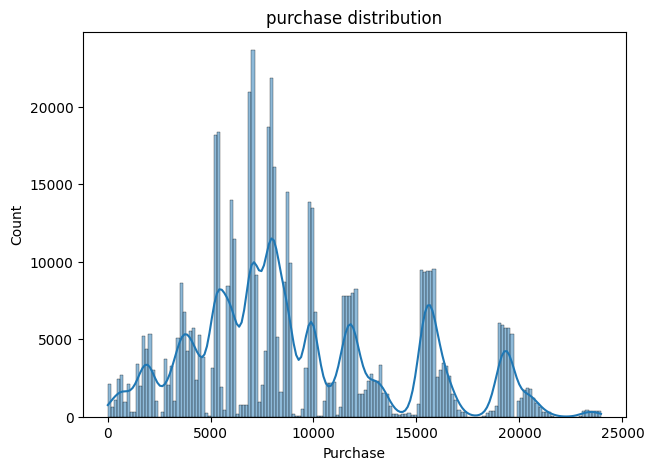

In [17]:
plt.figure(figsize=(7,5))
sns.histplot(x = data["Purchase"], kde=True)
plt.title("purchase distribution")
plt.show()

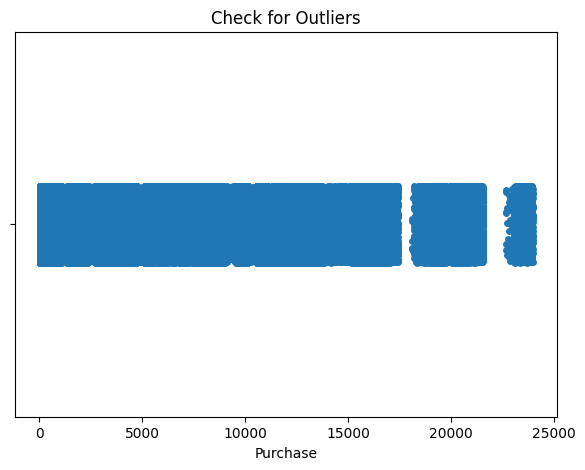

In [18]:
plt.figure(figsize=(7,5))
sns.stripplot(x = data["Purchase"])
plt.title('Check for Outliers')
plt.show()

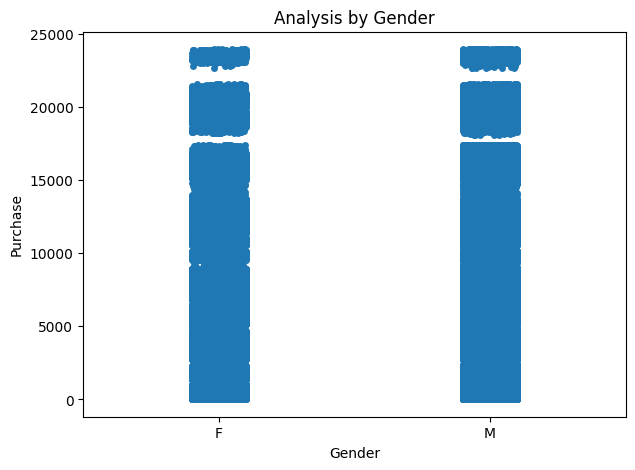

In [19]:
plt.figure(figsize=(7,5))
sns.stripplot(x = data['Gender'], y = data['Purchase'])
plt.title('Analysis by Gender')
plt.show()

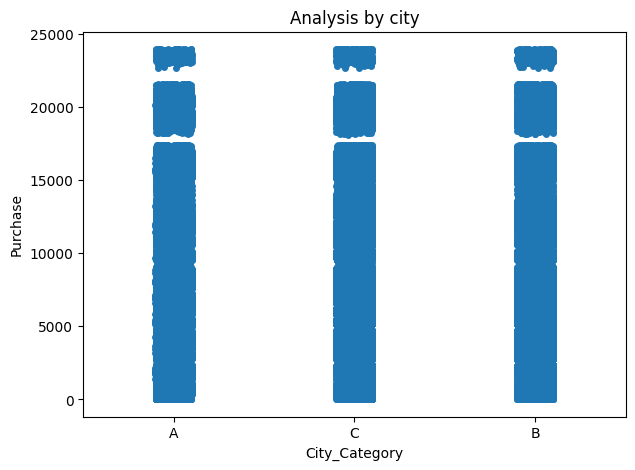

In [20]:
plt.figure(figsize=(7,5))
sns.stripplot(x = data['City_Category'], y = data['Purchase'])
plt.title('Analysis by city')
plt.show()

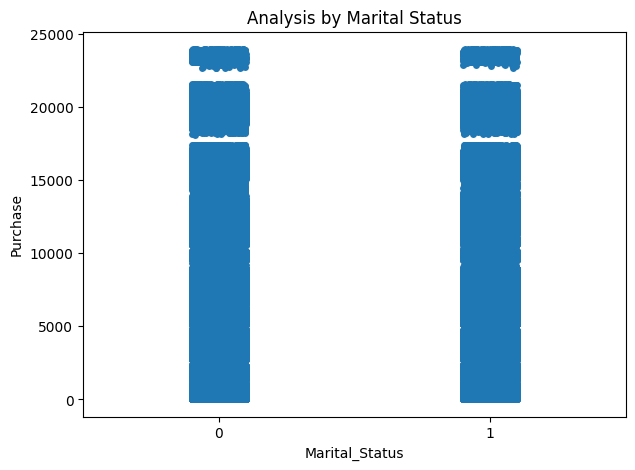

In [21]:
plt.figure(figsize=(7,5))
sns.stripplot(x = data['Marital_Status'], y = data['Purchase'])
plt.title('Analysis by Marital Status')
plt.show()

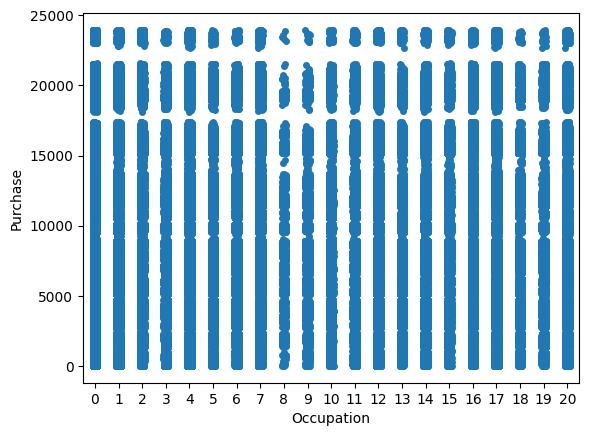

In [26]:
# Analysis by Occupation
sns.stripplot(x=data["Occupation"], y=data["Purchase"])
plt.show()

In [27]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,0,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,0,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [28]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [29]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
data['Gender'] = data['Gender'].map({"F":0, "M":1}).astype(int)
data['City_Category'] = data['City_Category'].map({"A":0, "B":1, "C":2}).astype(int)

In [31]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,0,2,0,1,0,14,15200
2,1000001,P00087842,0,0-17,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,0,2,0,12,0,0,1057
4,1000002,P00285442,1,55+,16,2,4+,0,8,0,0,7969


In [32]:
data.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
data.fillna(0, inplace = True)

In [34]:
data.rename(columns={'Product_Category_1':'pd_cat1','Product_Category_2':'pd_cat2','Product_Category_3':'pd_cat3'},inplace=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,pd_cat1,pd_cat2,pd_cat3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,0,2,0,1,0,14,15200
2,1000001,P00087842,0,0-17,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,0,2,0,12,0,0,1057
4,1000002,P00285442,1,55+,16,2,4+,0,8,0,0,7969


In [35]:
data['Age'] = data['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6} ).astype(int)

In [36]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,pd_cat1,pd_cat2,pd_cat3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,0,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,0,0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,0,0,7969


C:\Users\VIVEK\AppData\Local\Temp\ipykernel_2964\2630711064.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data['Age'], kde=True).set_xticklabels([ '0', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])


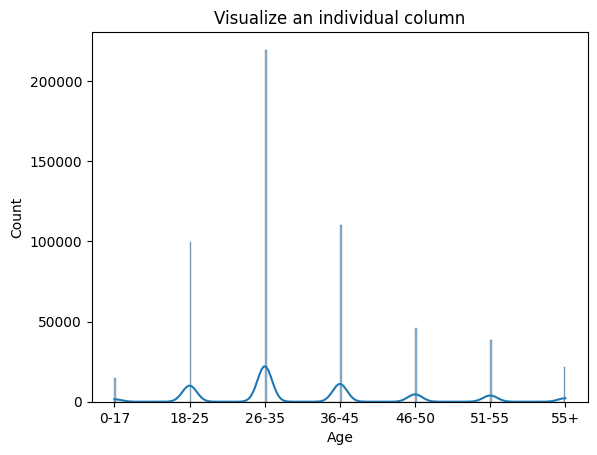

In [39]:
plt.figure()
sns.histplot(data['Age'], kde=True).set_xticklabels([ '0', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Visualize an individual column')
plt.show()

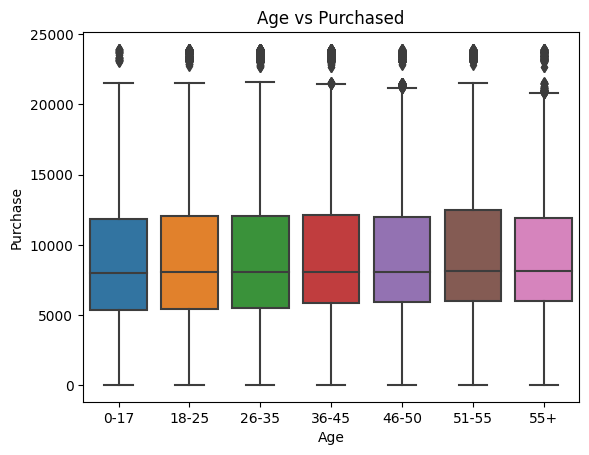

In [41]:
plt.figure()
sns.boxplot(x = data['Age'], y = data['Purchase']).set_xticklabels([ '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+' ])
plt.title('Age vs Purchased')
plt.show()

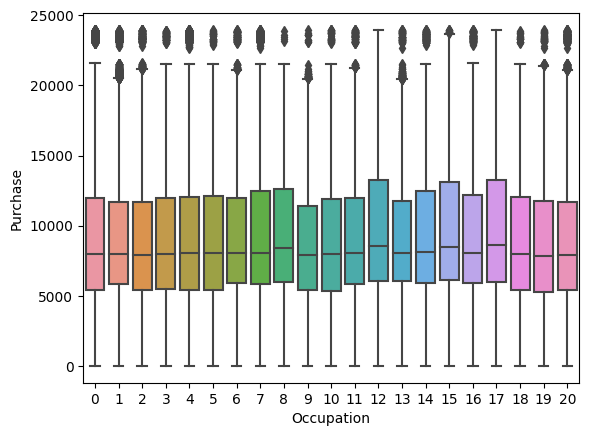

In [43]:
sns.boxplot(x=data["Occupation"], y=data["Purchase"])
plt.show()

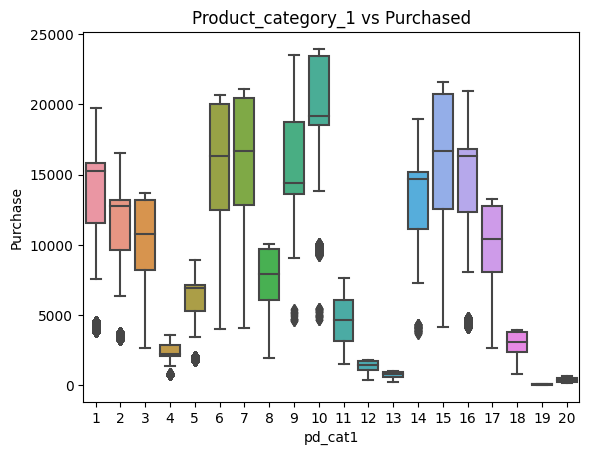

In [44]:
plt.figure()
sns.boxplot(x = data['pd_cat1'], y = data['Purchase'])
plt.title('Product_category_1 vs Purchased')
plt.show()

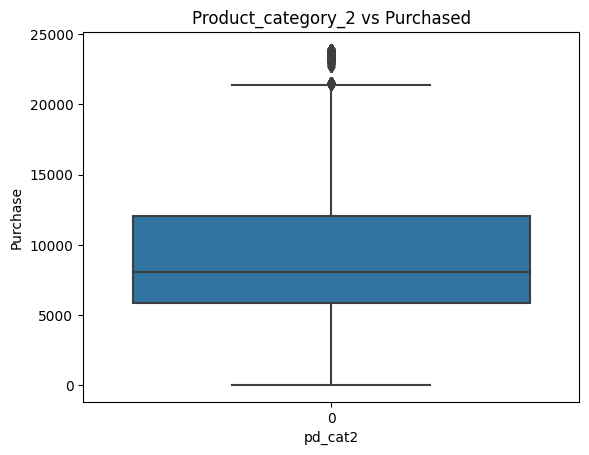

In [45]:
plt.figure()
sns.boxplot(x = data['pd_cat2'], y = data['Purchase'])
plt.title('Product_category_2 vs Purchased')
plt.show()

In [ ]:
plt.figure()
sns.boxplot(x = data['pd_cat3'], y = data['Purchase'])
plt.title('Product_category_3 vs Purchased')
plt.show()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'variable', y = 'value', data = pd.melt(df[['pd_cat1', 'pd_cat2', 'pd_cat3']]))
plt.title('Purchase vs Product (1,2,3)')
plt.show()

In [ ]:
plt.pie(df['City_Category'].value_counts(), labels=['A', 'B', 'C'], autopct = '%1.1f%%')
plt.show()